In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('2001-2012.csv')

In [4]:
df.head()

,STATE/UT,CRIME HEAD,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Andhra Pradesh,RAPE,871,1002,946,1016,935,1049,1070,1257,1188,1362,1442,1341
1,Arunachal Pradesh,RAPE,33,38,31,42,35,37,48,42,59,47,42,46
2,Assam,RAPE,817,970,1095,1171,1238,1244,1437,1438,1631,1721,1700,1716
3,Bihar,RAPE,888,1040,985,1390,1147,1232,1555,1302,929,795,934,927
4,Chhattisgarh,RAPE,959,992,898,969,990,995,982,978,976,1012,1053,1034


In [5]:
years_title = [str(i) for i in range(2001,2013)]

In [6]:
STATES_IN_INDIA = df['STATE/UT'].unique()
STATES_IN_INDIA = STATES_IN_INDIA[:-4]

STATES_IN_INDIA

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A&N Islands', 'Chandigarh', 'D&N Haveli',
       'Daman & Diu', 'Delhi UT', 'Lakshadweep', 'Puducherry'],
      dtype=object)

In [7]:
TYPES_OF_CASES = df['CRIME HEAD'].unique()
TYPES_OF_CASES = TYPES_OF_CASES[:-1]
TYPES_OF_CASES

array(['RAPE', 'KIDNAPPING & ABDUCTION', 'DOWRY DEATH',
       'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO THE MODESTY OF WOMEN',
       'CRUELTY BY HUSBAND OR RELATIVES',
       'IMMORAL TRAFFIC(PREVENTION)ACT',
       'INDECENT REPRESENTATION OF WOMEN(PREVENTION)ACT'], dtype=object)

C:\Users\Software\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


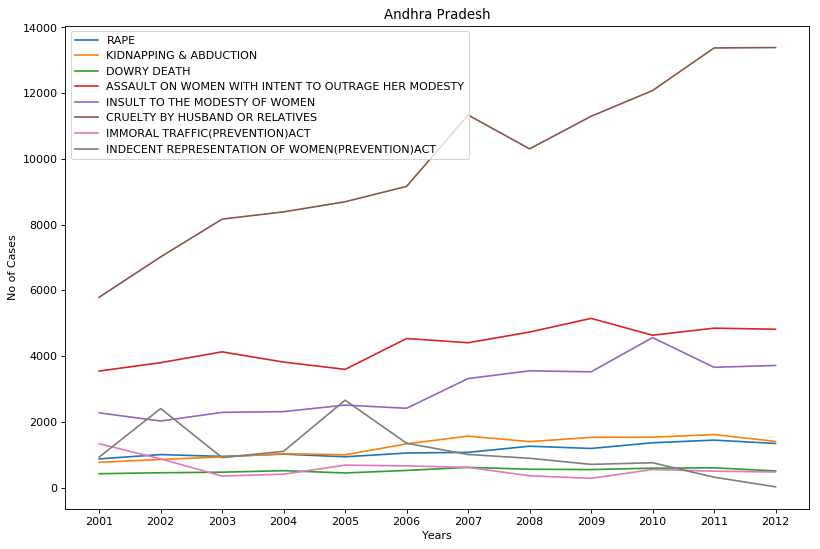

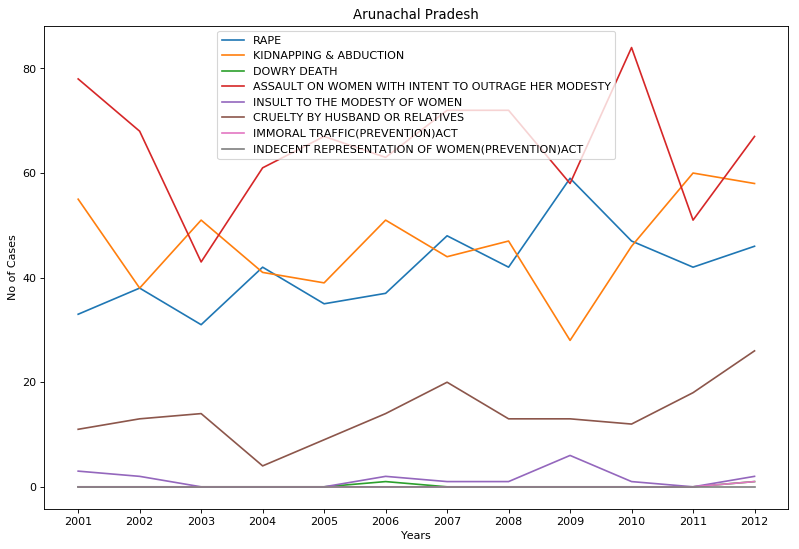

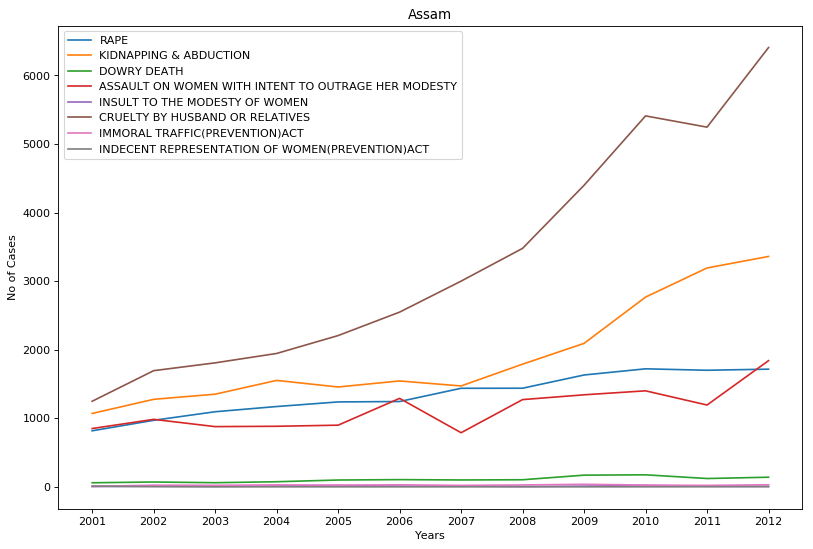

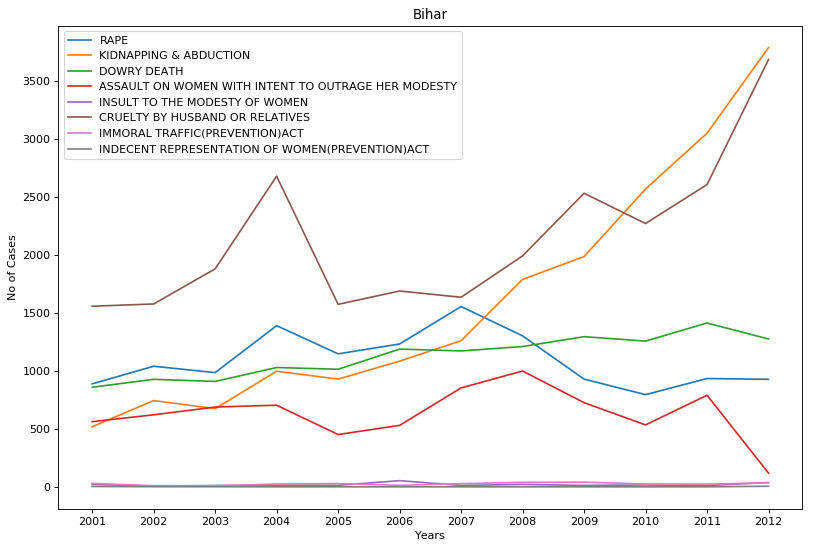

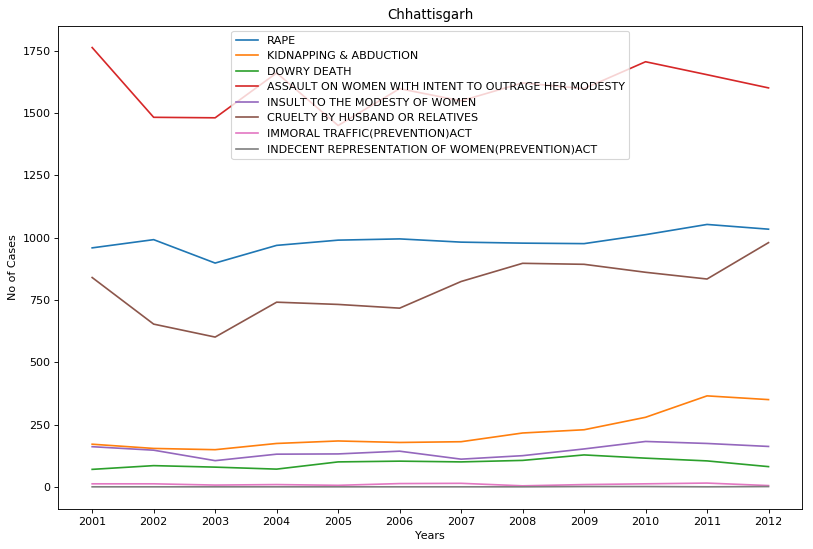

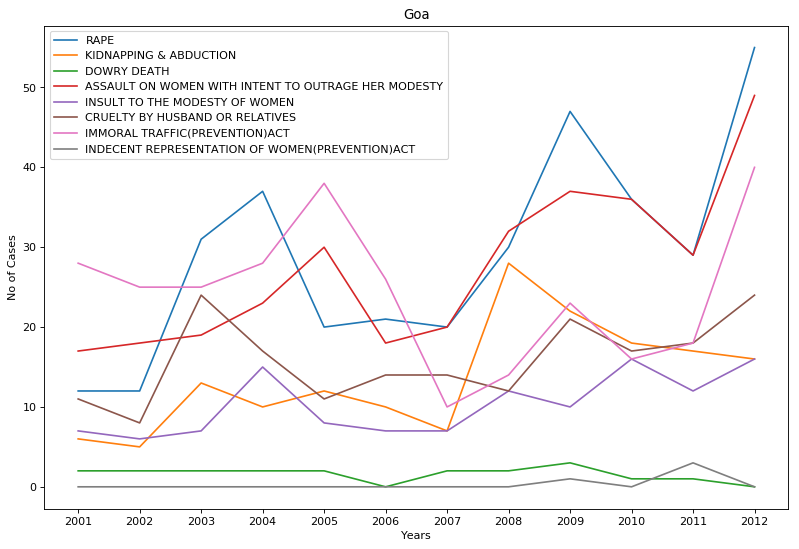

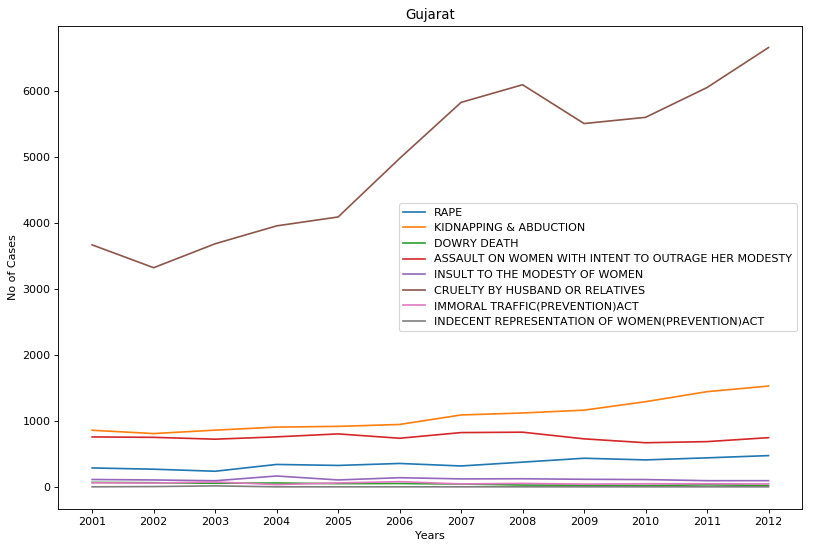

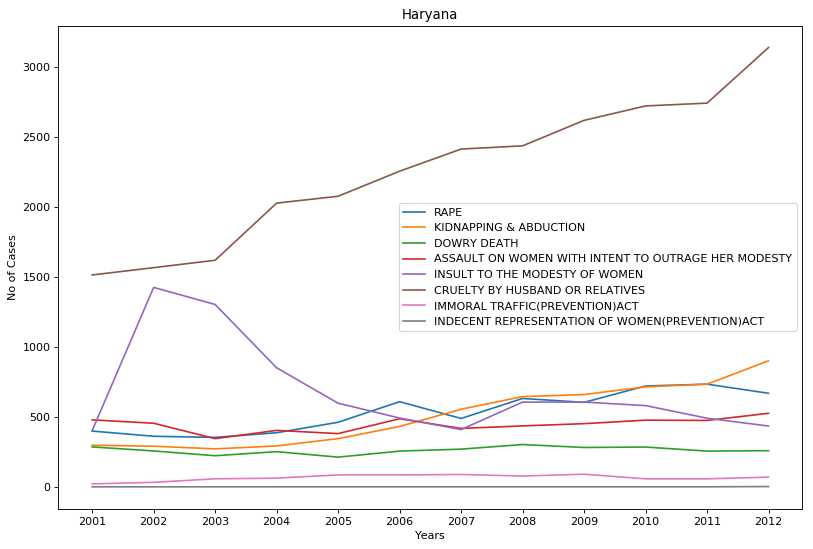

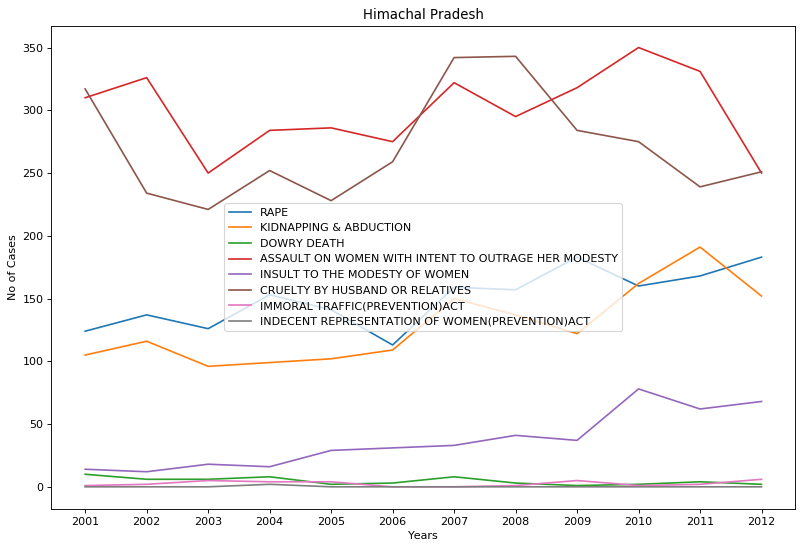

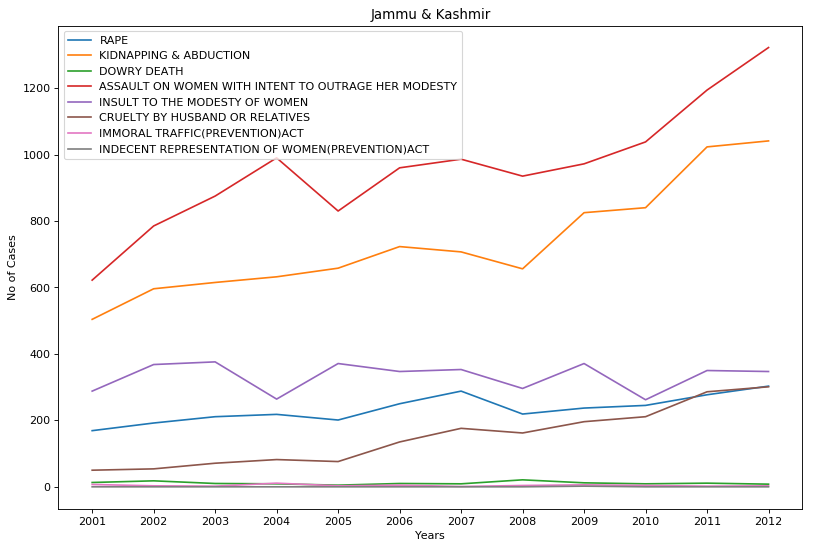

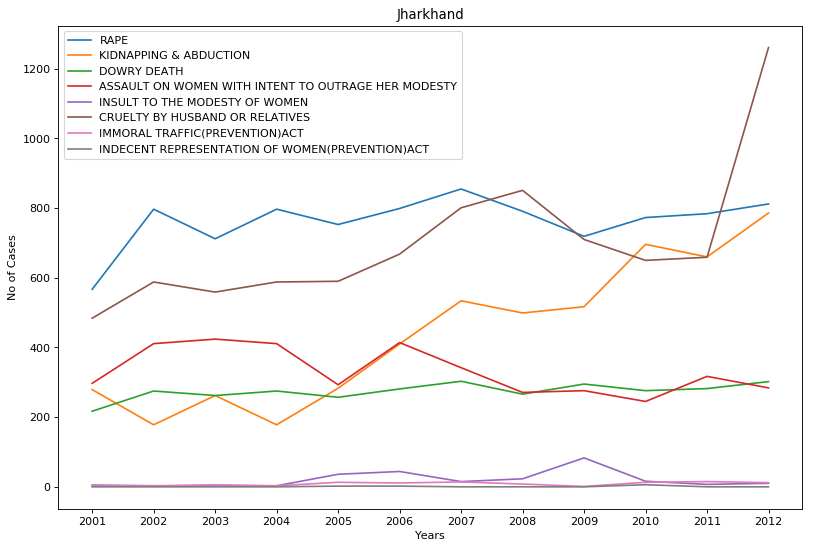

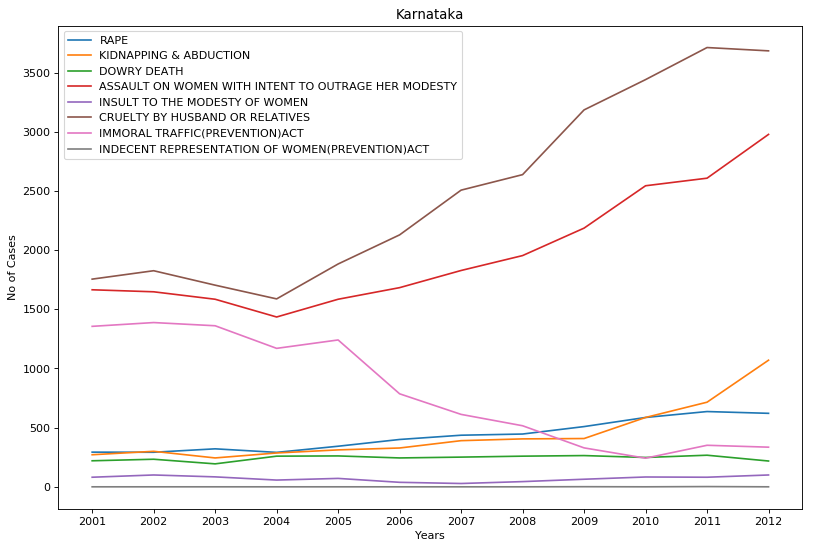

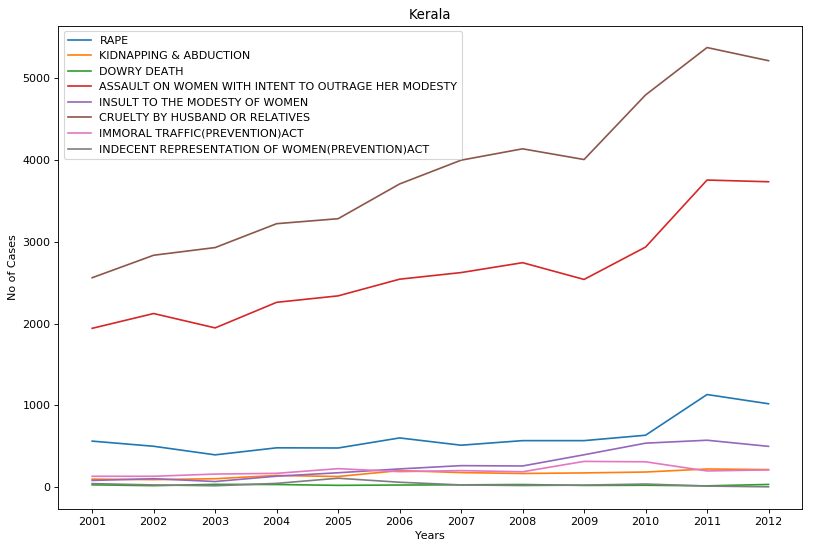

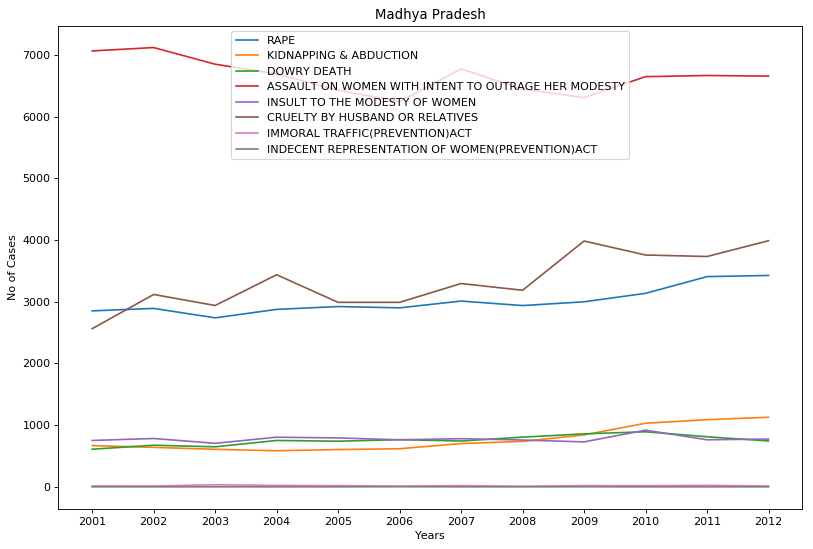

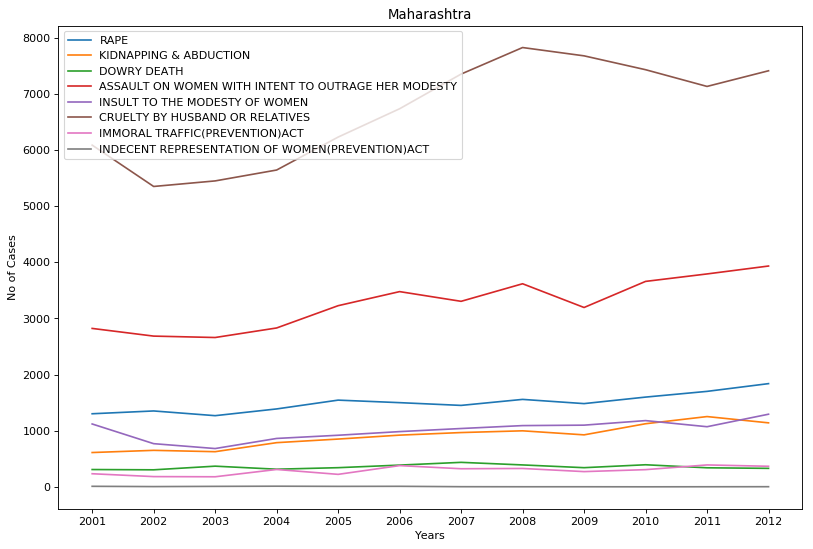

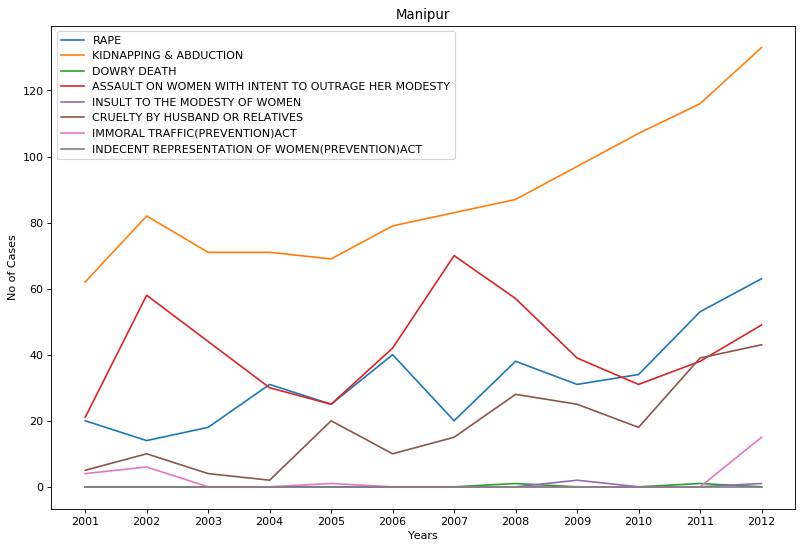

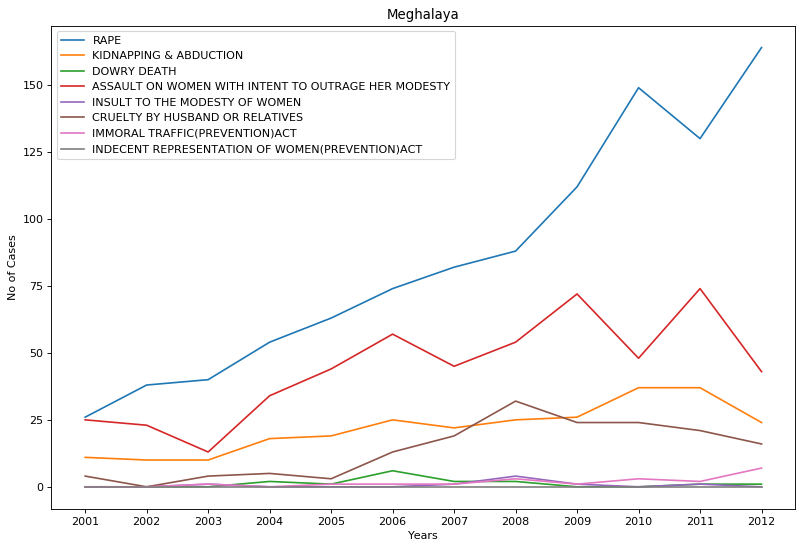

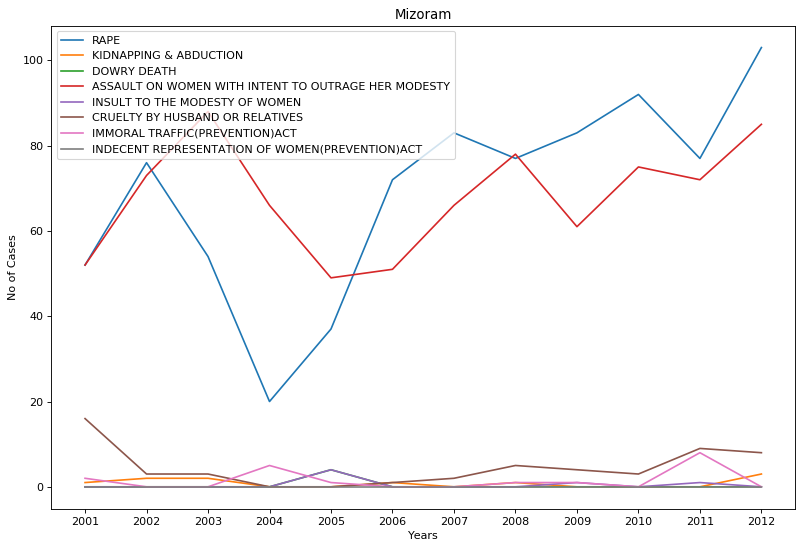

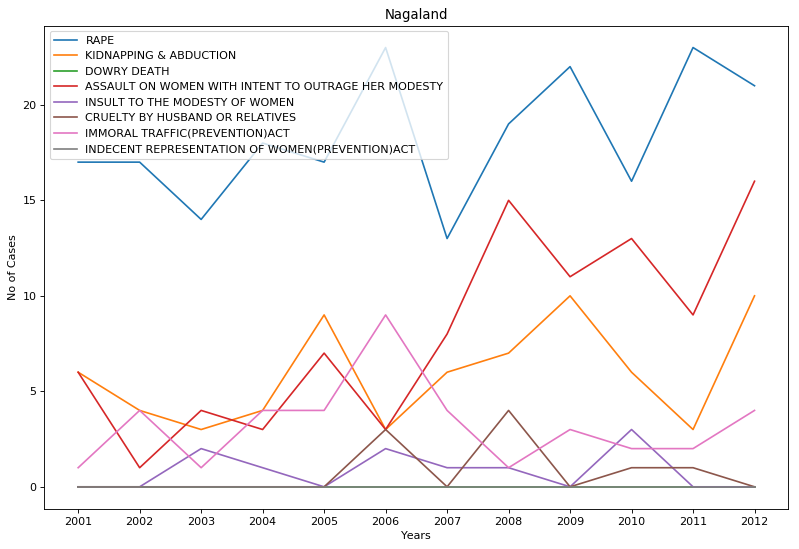

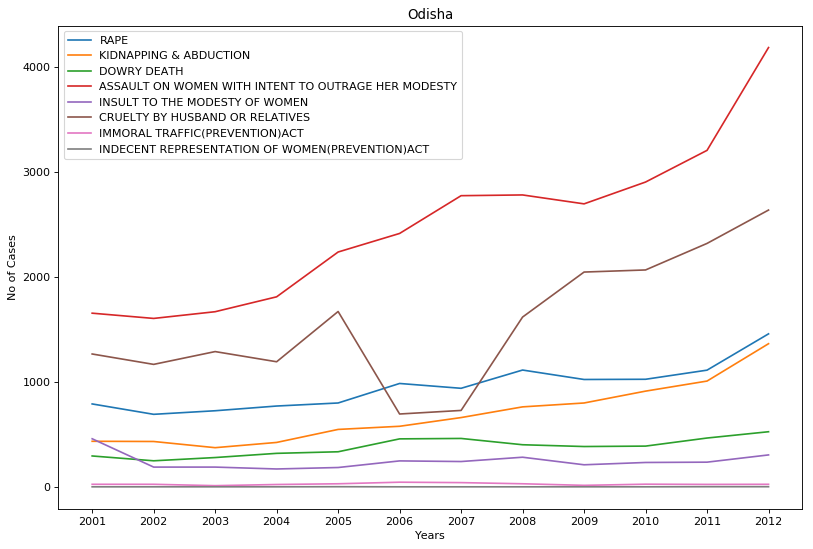

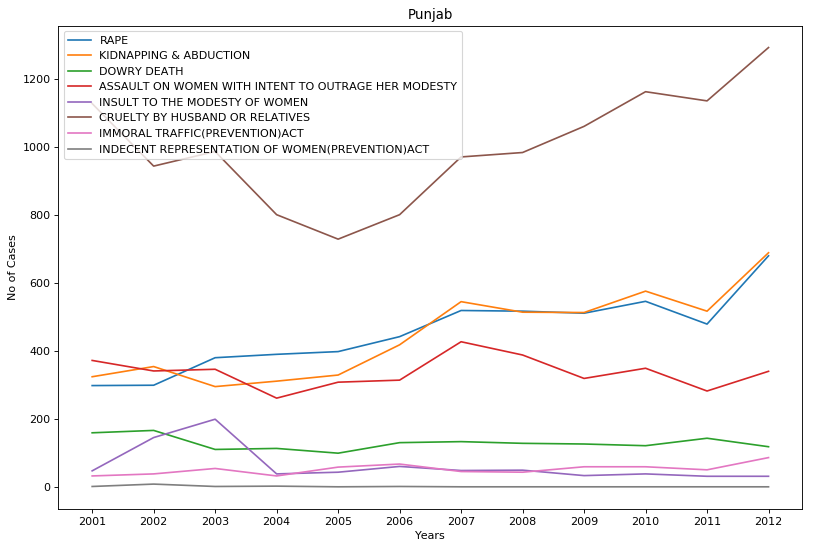

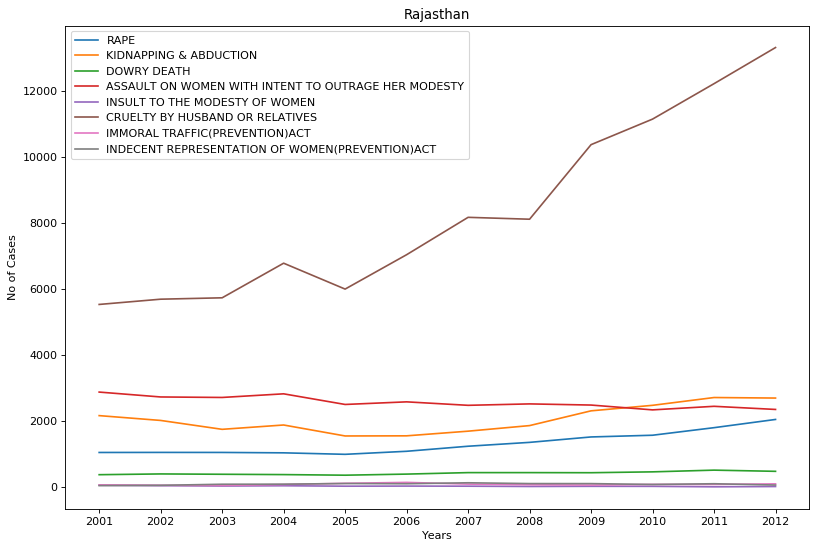

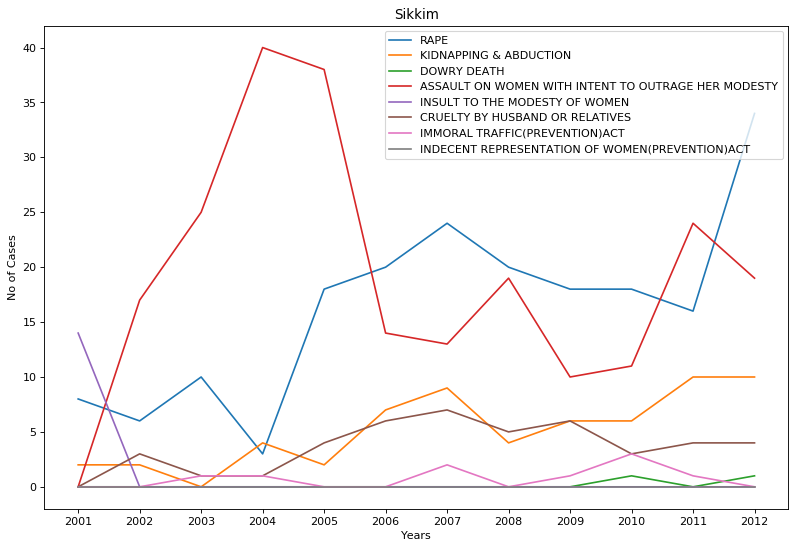

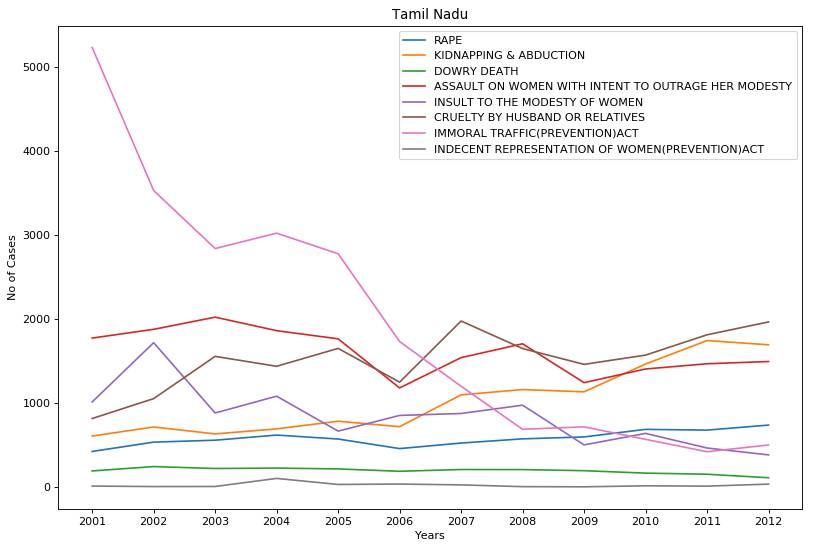

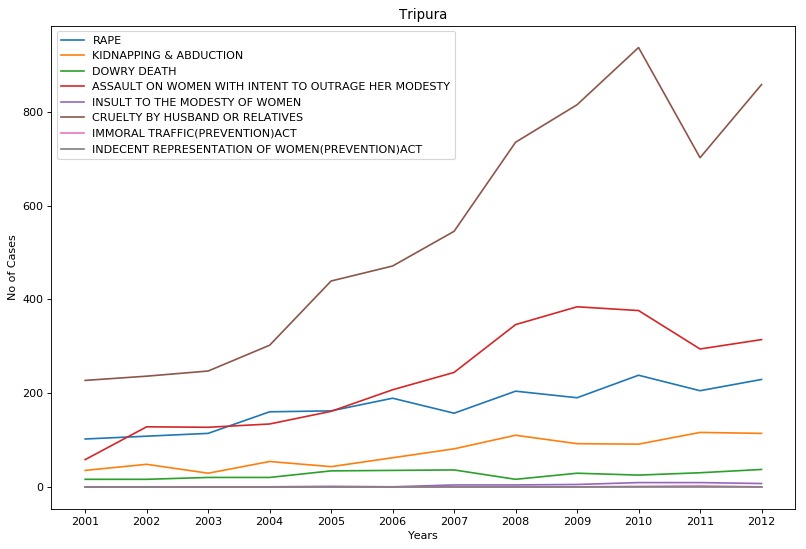

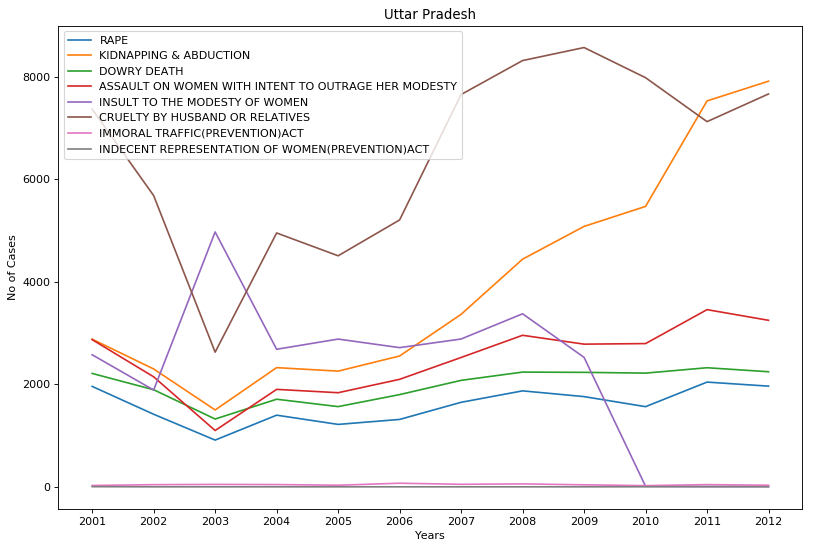

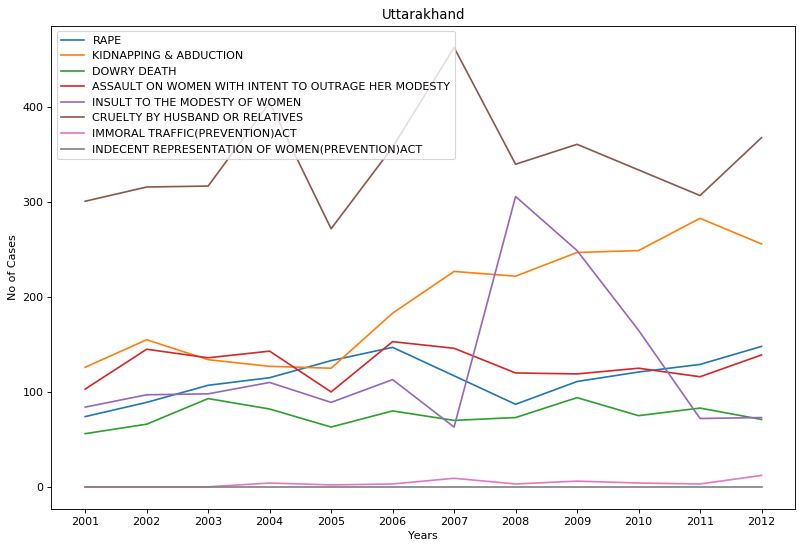

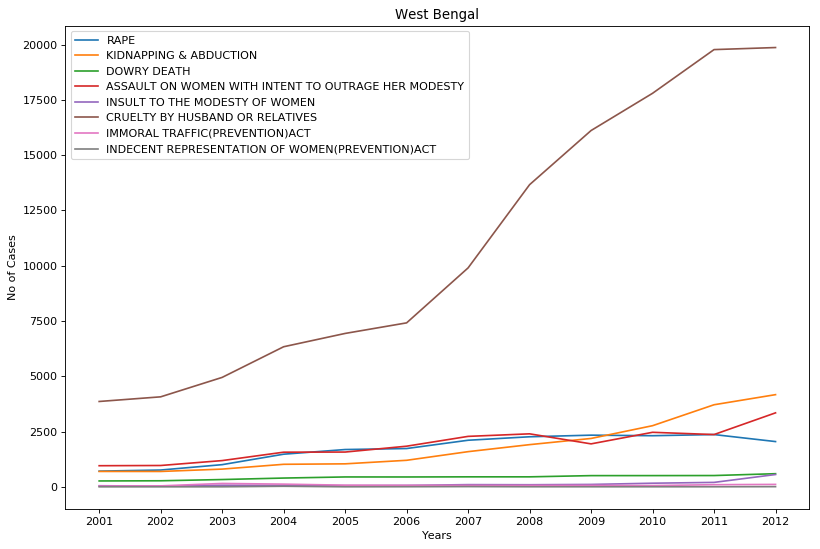

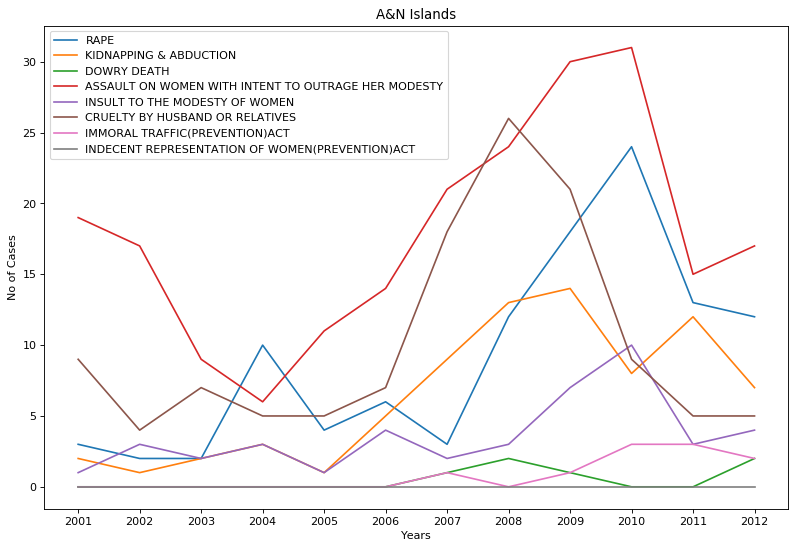

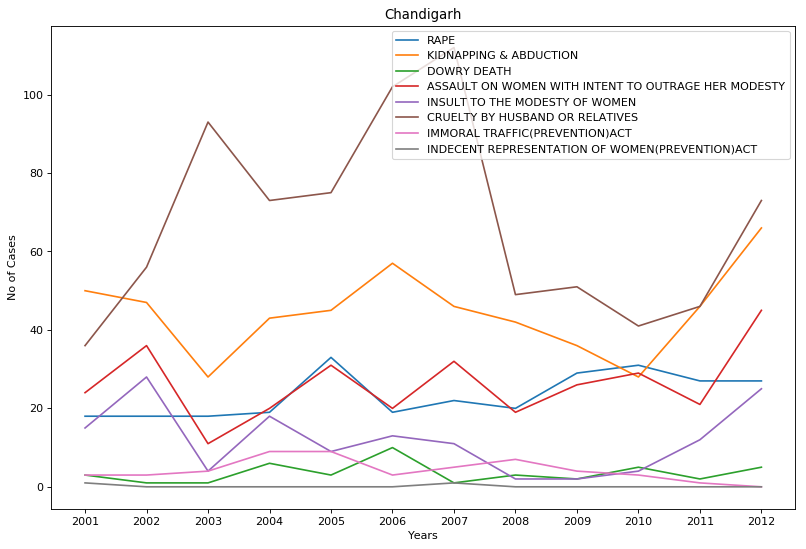

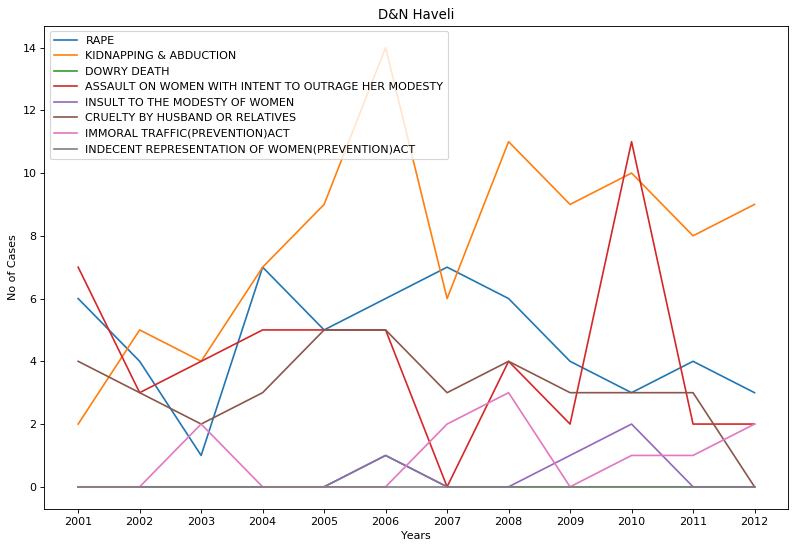

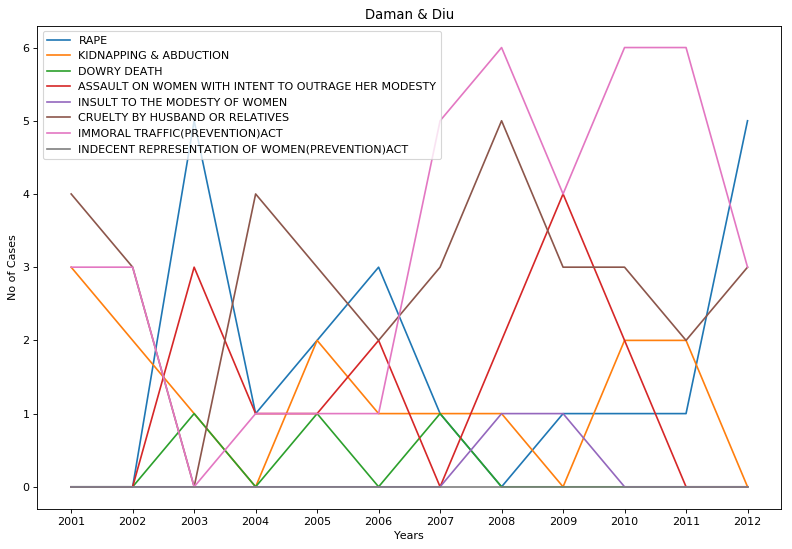

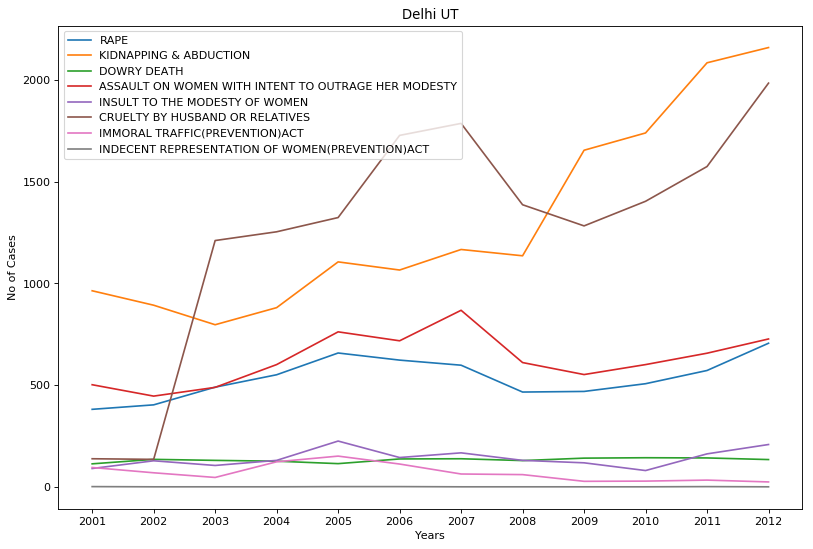

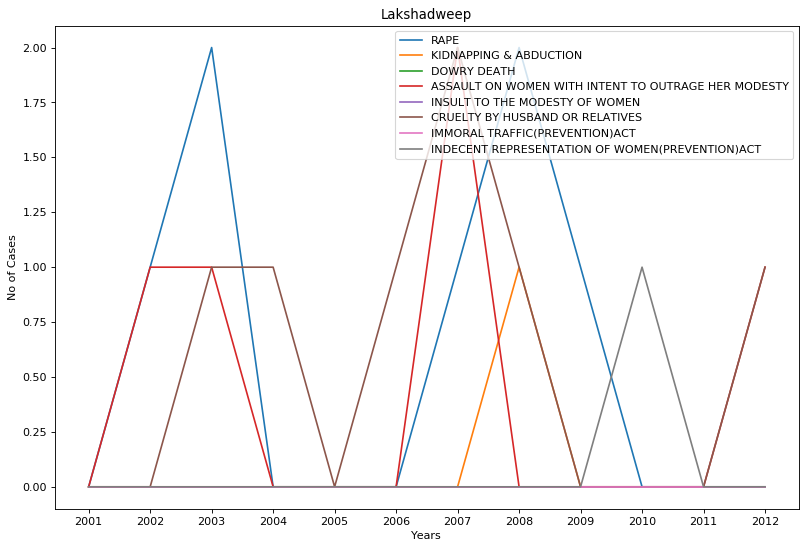

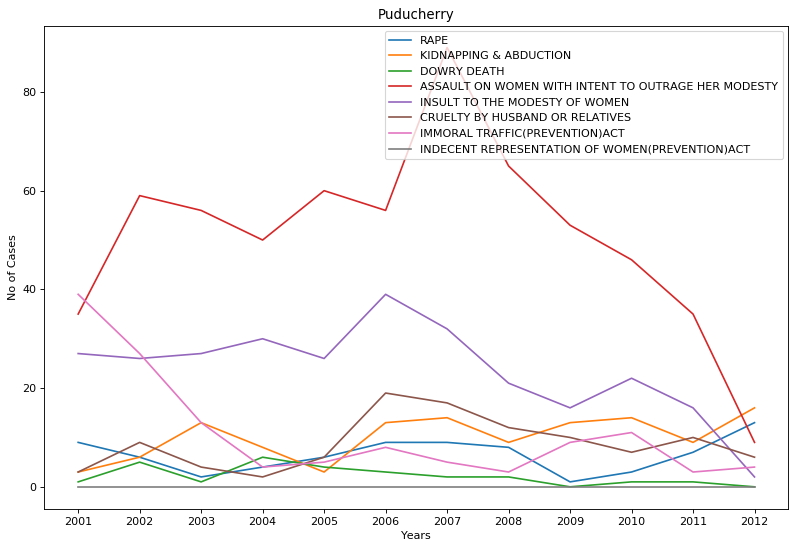

In [8]:
for state in STATES_IN_INDIA:
    fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
    plt.title(state)
    plt.xlabel('Years')
    plt.ylabel('No of Cases')
    for case in TYPES_OF_CASES:
        temp_df = df[(df['STATE/UT'] == state ) & (df['CRIME HEAD'] == case)]
        N_cases = [temp_df[c].values[0] for c in years_title]
        plt.plot(years_title,N_cases)
        plt.legend(TYPES_OF_CASES)

### Total Crime against women state wise

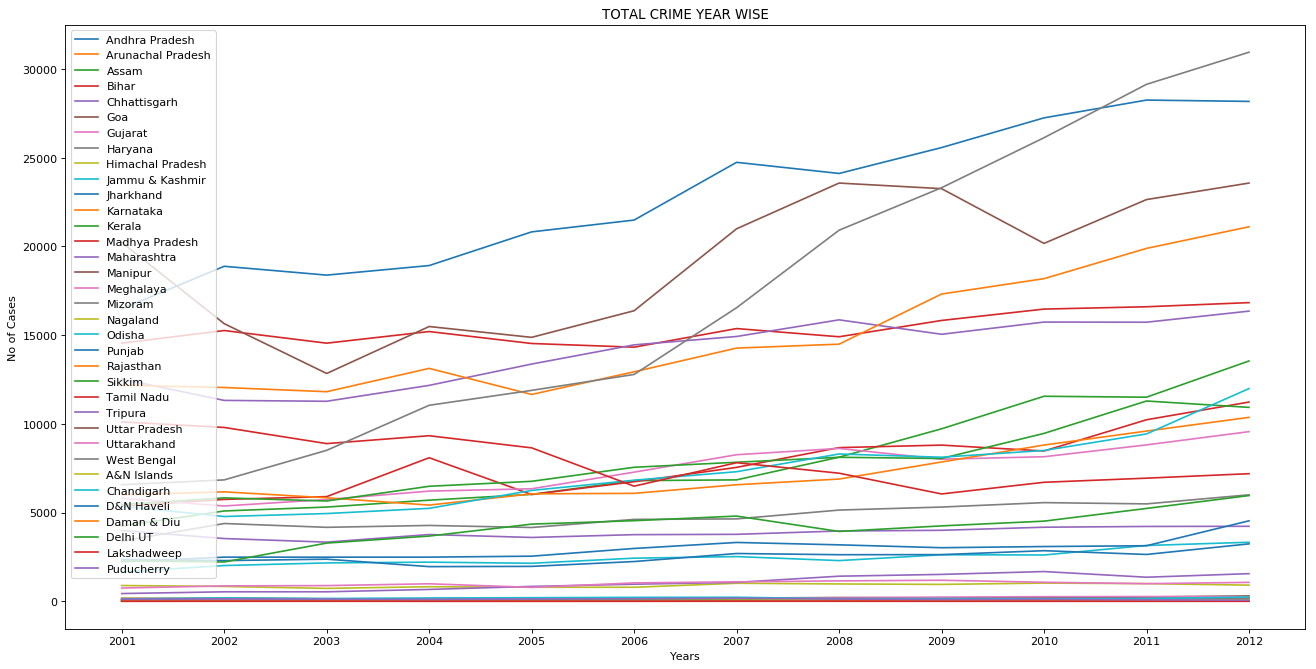

In [9]:
fig=plt.figure(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.title('TOTAL CRIME YEAR WISE')
plt.xlabel('Years')
plt.ylabel('No of Cases')
for state in STATES_IN_INDIA:
    temp_df = df[(df['STATE/UT'] == state ) & (df['CRIME HEAD'] == 'TOTAL CRIMES AGAINST WOMEN')]
    N_cases = [temp_df[c].values[0] for c in years_title]
    plt.plot(years_title,N_cases)
    plt.legend(STATES_IN_INDIA)

In [10]:
print('Data set:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

print()


Data set:
Feature 'STATE/UT' has 39 categories
Feature 'CRIME HEAD' has 9 categories



In [11]:
from sklearn import preprocessing

lab=preprocessing.LabelEncoder()

#df['STATE/UT']=lab.fit_transform(df['STATE/UT'])
df['CRIME HEAD']=lab.fit_transform(df['CRIME HEAD'])

df.head()

,STATE/UT,CRIME HEAD,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Andhra Pradesh,7,871,1002,946,1016,935,1049,1070,1257,1188,1362,1442,1341
1,Arunachal Pradesh,7,33,38,31,42,35,37,48,42,59,47,42,46
2,Assam,7,817,970,1095,1171,1238,1244,1437,1438,1631,1721,1700,1716
3,Bihar,7,888,1040,985,1390,1147,1232,1555,1302,929,795,934,927
4,Chhattisgarh,7,959,992,898,969,990,995,982,978,976,1012,1053,1034


In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9)

kmeans.fit(df.iloc[:,1:])

KMeans(n_clusters=9)

In [13]:
kmeans.cluster_centers_

array([[3.84810127e+00, 1.08202532e+02, 1.16759494e+02, 1.08848101e+02,
        1.15059072e+02, 1.16232068e+02, 1.24852321e+02, 1.31649789e+02,
        1.32523207e+02, 1.30611814e+02, 1.38599156e+02, 1.42139241e+02,
        1.53265823e+02],
       [8.00000000e+00, 1.43795000e+05, 1.43034000e+05, 1.40601000e+05,
        1.54333000e+05, 1.55553000e+05, 1.64765000e+05, 1.85312000e+05,
        1.95857000e+05, 2.03804000e+05, 2.13585000e+05, 2.28650000e+05,
        2.44270000e+05],
       [7.40000000e+00, 1.47988000e+04, 1.44496000e+04, 1.37746000e+04,
        1.58528000e+04, 1.63380000e+04, 1.74812000e+04, 2.06856000e+04,
        2.25996000e+04, 2.38536000e+04, 2.51010000e+04, 2.79578000e+04,
        2.91734000e+04],
       [1.00000000e+00, 4.91700000e+04, 4.92370000e+04, 5.07030000e+04,
        5.81210000e+04, 5.83190000e+04, 6.31280000e+04, 7.59300000e+04,
        8.13440000e+04, 8.95460000e+04, 9.40410000e+04, 9.91350000e+04,
        1.06527000e+05],
       [4.78571429e+00, 6.48300000e+

In [14]:
labels=kmeans.labels_
labels

array([6, 0, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 8, 6, 0, 0, 0, 0, 6, 0, 6,
       0, 0, 0, 6, 0, 6, 0, 0, 0, 0, 0, 0, 0, 2, 6, 0, 6, 6, 0, 0, 6, 0,
       0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 6, 0, 6, 0, 8, 0, 6, 0, 0,
       0, 0, 6, 0, 0, 2, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 8, 0,
       6, 0, 6, 0, 0, 0, 0, 6, 0, 6, 6, 4, 8, 0, 0, 0, 0, 6, 0, 6, 0, 6,
       0, 6, 0, 6, 0, 0, 0, 0, 0, 0, 0, 5, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 4, 0, 8, 6, 0, 0, 8, 6, 0, 0, 0, 6, 8, 8, 4, 0, 0, 0,
       0, 6, 6, 4, 0, 6, 0, 4, 0, 7, 0, 0, 0, 0, 6, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 6, 2, 0, 4, 4, 8, 0, 4, 8, 6, 6, 8, 4, 4,

In [15]:
import numpy as np

unique, counts = np.unique(kmeans.labels_, return_counts=True)

dict_data = dict(zip(unique, counts))
dict_data

{0: 237, 1: 1, 2: 5, 3: 1, 4: 14, 5: 1, 6: 47, 7: 4, 8: 14}

In [16]:

df["cluster"] = kmeans.labels_


C:\Users\Software\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\Software\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


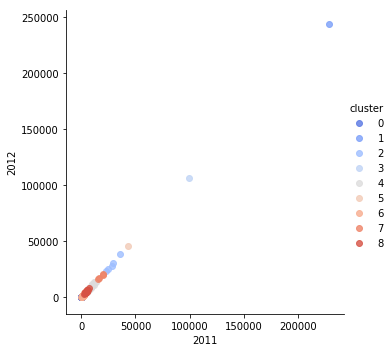

In [17]:
import seaborn as sns
sns.lmplot('2011', '2012', data=df, hue='cluster', palette='coolwarm', size=5, aspect=1, fit_reg=False)



In [18]:
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

kmeans.inertia_

2194848753.5095105

In [19]:

kmeans.score

<bound method KMeans.score of KMeans(n_clusters=9)>

In [20]:

df

,STATE/UT,CRIME HEAD,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,cluster
0,Andhra Pradesh,7,871,1002,946,1016,935,1049,1070,1257,1188,1362,1442,1341,6
1,Arunachal Pradesh,7,33,38,31,42,35,37,48,42,59,47,42,46,0
2,Assam,7,817,970,1095,1171,1238,1244,1437,1438,1631,1721,1700,1716,6
3,Bihar,7,888,1040,985,1390,1147,1232,1555,1302,929,795,934,927,6
4,Chhattisgarh,7,959,992,898,969,990,995,982,978,976,1012,1053,1034,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,Daman & Diu,8,10,8,10,7,10,9,11,15,13,14,11,11,0
320,Delhi UT,8,2291,2216,3282,3677,4351,4544,4804,3938,4251,4518,5234,5959,8
321,Lakshadweep,8,0,2,4,1,0,1,5,4,1,1,0,2,0
322,Puducherry,8,119,141,121,110,127,149,179,129,106,115,89,61,0


In [21]:
cust = [[7,871,1002,946,1016,935,1049,1070,1257,1188,1362,1442,1341]]
kmeans.predict(cust)[0]

6

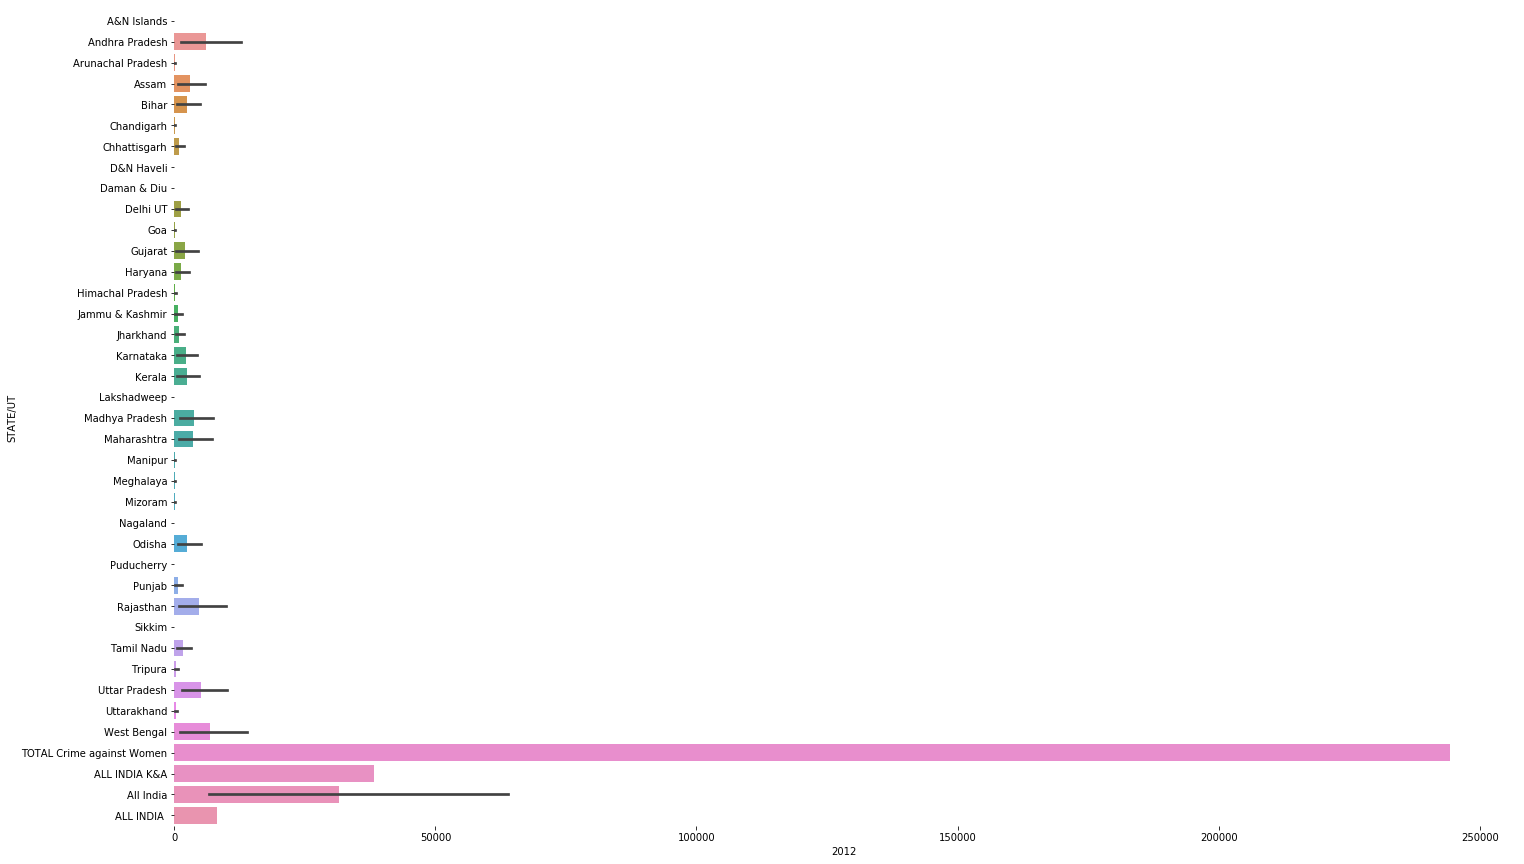

In [22]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(24, 15))

# Load the dataset
stats = df.sort_values([ "cluster", "STATE/UT"], ascending=True)
sns.set_color_codes("pastel")
sns.barplot(y="STATE/UT", x="2012", data=stats)

sns.despine(left=True, bottom=True)

In [23]:
X = df.iloc[:,1:14]
y = df.iloc[:,df.columns=='cluster']


In [24]:

print(X.head())

y.head()


   CRIME HEAD  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  \
0           7   871  1002   946  1016   935  1049  1070  1257  1188  1362   
1           7    33    38    31    42    35    37    48    42    59    47   
2           7   817   970  1095  1171  1238  1244  1437  1438  1631  1721   
3           7   888  1040   985  1390  1147  1232  1555  1302   929   795   
4           7   959   992   898   969   990   995   982   978   976  1012   

   2011  2012  
0  1442  1341  
1    42    46  
2  1700  1716  
3   934   927  
4  1053  1034  


,cluster
0,6
1,0
2,6
3,6
4,6


In [25]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)



In [26]:

#Random Forest

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train,y_train)

y_pred = random_forest.predict(X_test)
print(y_pred)

from sklearn.metrics import accuracy_score,classification_report
acc1=accuracy_score(y_pred,y_test)
print(acc1)

clf=classification_report(y_pred,y_test)
print(clf)



C:\Users\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[8 0 0 0 0 0 0 0 6 0 0 0 6 0 5 0 0 0 0 8 6 0 0 0 0 6 4 0 0 0 0 0 0 0 6 0 0
 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 6 6 0 6 0 0 4 0 0 0 0 0 0]
0.9692307692307692
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         1
           6       1.00      0.88      0.93         8
           8       1.00      1.00      1.00         3

    accuracy                           0.97        65
   macro avg       0.66      0.65      0.65        65
weighted avg       0.97      0.97      0.97        65



C:\Users\Software\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Software\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Software\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Software\Anaconda3\lib\site-packages\sklearn\

In [27]:
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression()

lg.fit(X_train,y_train)

predic2=lg.predict(X_test)

acc2=accuracy_score(predic2,y_test)
print(acc2)

clf2=classification_report(predic2,y_test)
print(clf2)



0.16923076923076924
              precision    recall  f1-score   support

           0       0.19      0.91      0.32        11
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         7
           6       0.14      0.08      0.11        12
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00        10

    accuracy                           0.17        65
   macro avg       0.04      0.11      0.05        65
weighted avg       0.06      0.17      0.07        65



C:\Users\Software\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Software\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Software\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted sample

In [28]:
from sklearn import svm

sv=svm.LinearSVC()

sv.fit(X_train,y_train)

predic3=sv.predict(X_test)

acc3=accuracy_score(predic3,y_test)
print(acc3)

clf3=classification_report(predic3,y_test)
print(clf3)



C:\Users\Software\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Software\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5692307692307692
              precision    recall  f1-score   support

           0       0.71      0.93      0.80        40
           1       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         1

    accuracy                           0.57        65
   macro avg       0.09      0.12      0.10        65
weighted avg       0.44      0.57      0.49        65



C:\Users\Software\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Software\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Software\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Software\Anaconda3\lib\site-packages\sklearn\

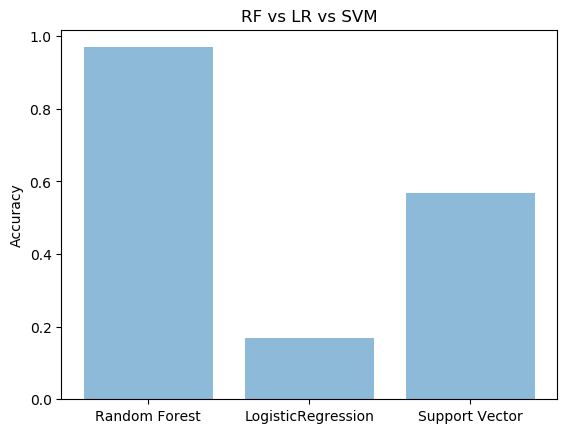

In [29]:
import matplotlib.pyplot as plt; plt.rcdefaults()

objects = ('Random Forest','LogisticRegression','Support Vector')
y_pos = np.arange(len(objects))
performance = [acc1,acc2,acc3]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('RF vs LR vs SVM')

plt.show()

In [31]:
df["cluster",""]

,0,1,2,3,4,5,6,7,8,9,...,314,315,316,317,318,319,320,321,322,323
STATE/UT,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,...,Uttarakhand,West Bengal,A&N Islands,Chandigarh,D&N Haveli,Daman & Diu,Delhi UT,Lakshadweep,Puducherry,TOTAL Crime against Women
CRIME HEAD,7,7,7,7,7,7,7,7,7,7,...,8,8,8,8,8,8,8,8,8,8
2001,871,33,817,888,959,12,286,398,124,169,...,749,6570,34,150,19,10,2291,0,119,143795
2002,1002,38,970,1040,992,12,267,361,137,192,...,870,6842,27,189,15,8,2216,2,141,143034
2003,946,31,1095,985,898,31,236,353,126,211,...,886,8508,22,159,13,10,3282,4,121,140601
2004,1016,42,1171,1390,969,37,339,386,153,218,...,988,11047,27,188,22,7,3677,1,110,154333
2005,935,35,1238,1147,990,20,324,461,141,201,...,786,11887,22,205,24,10,4351,0,127,155553
2006,1049,37,1244,1232,995,21,354,608,113,250,...,1038,12785,36,224,32,9,4544,1,149,164765
2007,1070,48,1437,1555,982,20,316,488,159,288,...,1097,16544,56,230,18,11,4804,5,179,185312
2008,1257,42,1438,1302,978,30,374,631,157,219,...,1151,20912,80,143,28,15,3938,4,129,195857
